# Project Analyze Resuls

## PIP Installs

In [2]:
# PIPs
# !pip install pydub
# !pip install timm==0.4.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.1 MB/s 


## Drive Mount

In [3]:
# mount gdrive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports

In [4]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import pickle
import json

from pathlib import Path

sys.path.append('/content/gdrive/My Drive/DeepLearning/project/')
sys.path.append('/content/gdrive/My Drive/DeepLearning/project/SSAST/src')
!cd '/content/gdrive/My Drive/DeepLearning/project/SSAST/src'

# cd gdrive/My Drive/DeepLearning/project/
# import wav_processing as wp
# import project_utils
# import birds_run
# import birds_ssast_data_setting as birds_ds
# from data_validator import Validator

import analyze_ssast_results as anz


## File Path

In [47]:
labeld_data_path = '/content/gdrive/My Drive/DeepLearning/project/labeled_data/'
experiments_path = '/content/gdrive/My Drive/DeepLearning/project/experiments/'
plots_path = '/content/gdrive/My Drive/DeepLearning/project/experiments/00 Plots'
experiment_name = '2022_09_30_filter_10_Resampling No Mixing Aug' # '2022_09_15_filter_100_Mix_0_8'

result_path = Path(experiments_path, experiment_name)
predictions_path = Path(result_path, 'predictions')

# Run parameters and results
arg_filename = 'args.pkl'
# pred_filename = 'predictions_valid_set.csv'
pred_filename = 'predictions_eval_set.csv'
# target_filename = 'target_test.csv'
target_filename = 'eval_target.csv'
labels_filename = 'birdcalls_class_labels_indices.csv'
csv_dst_filename = 'results_anlz_stats.csv'

pred_path = Path(predictions_path, pred_filename)
target_path = Path(predictions_path, target_filename)
args_path = Path(result_path, arg_filename)
labels_path = Path(labeld_data_path, labels_filename)
csv_dst_path = Path(result_path, csv_dst_filename)

# jsons
json_dir = labeld_data_path
train_json = Path(json_dir, 'birdcalls_train_data_low_count_filter_100.json')
validate_json = Path(json_dir, 'birdcalls_validate_data_low_count_filter_100.json')
test_json = Path(json_dir, 'birdcalls_test_data_low_count_filter_100.json')

## Analyze Results

In [33]:
sr = anz.SSASTResults(pred_path, target_path, args_path=args_path, labels_path=labels_path)
sr.calc_stats(th=0.1)

In [26]:
sr.stats_dict.keys()

dict_keys(['NoCall', 'EgyptianGoose', 'EurasianBlackcap', 'CommonRedstart', 'HoodedCrow', 'Rose-RingedParakeet', 'CommonMyna', 'BarnSwallow', 'EuropeanBee-Eater', 'GracefulPrinia', 'CommonNightingale', 'EuropeanGreenfinch', 'Pycnonotus', 'EurasianCollaredDove', 'EuropeanRobin', 'Spur-WingedLapwing', 'EuropeanGoldfinch', 'CommonBlackbird', 'CommonSwift', 'LesserWhitethroat', 'Upupa', 'CommonKingfisher', 'PalestineSunbird', 'White-ThroatedKingfisher', 'GreatTit', 'CommonChaffinch', 'MonkParakeet', 'LaughingDove'])

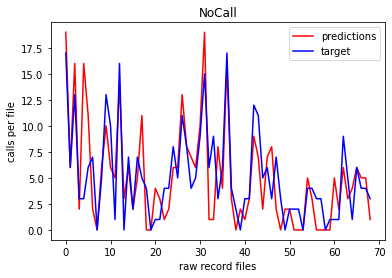

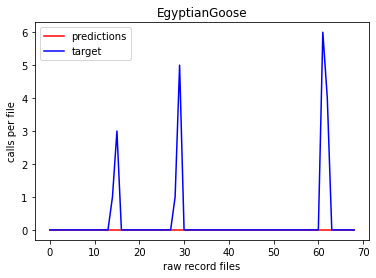

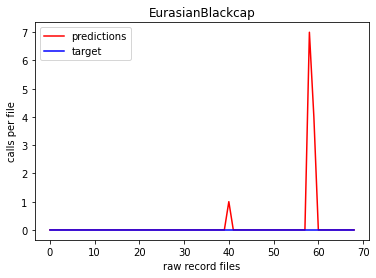

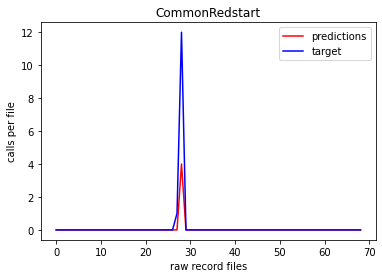

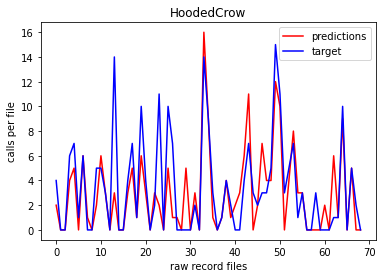

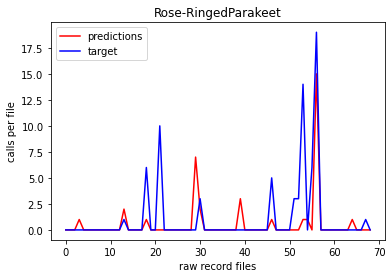

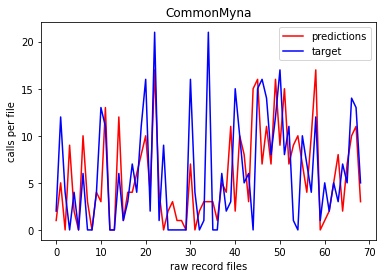

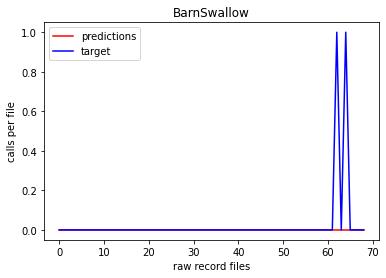

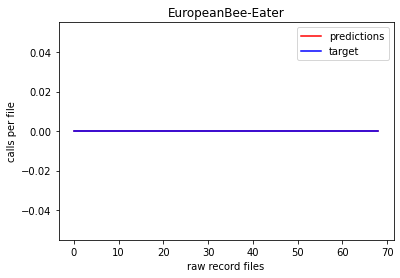

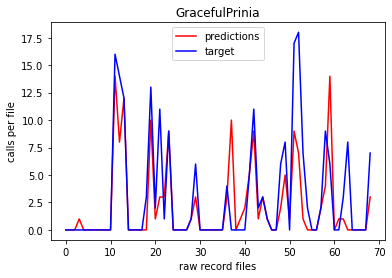

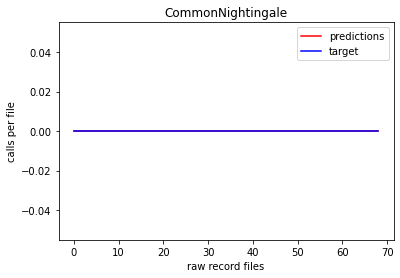

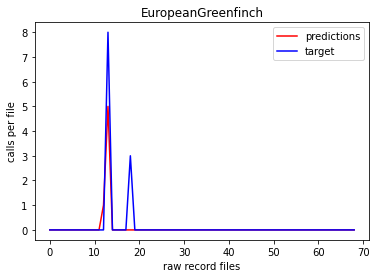

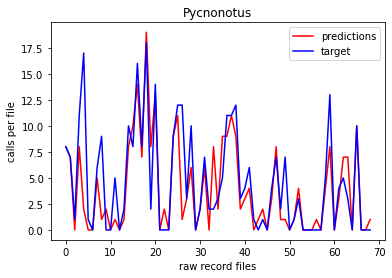

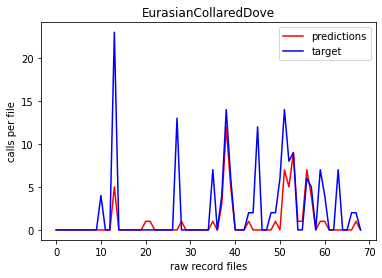

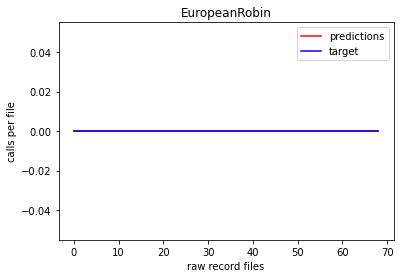

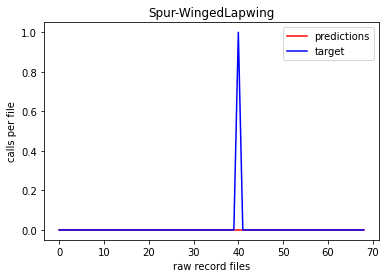

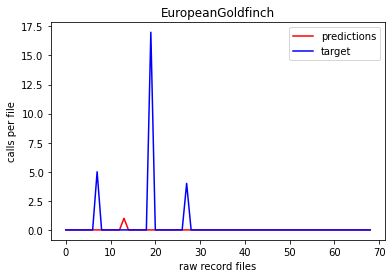

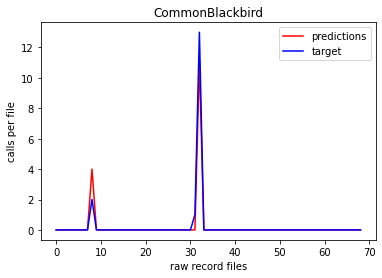

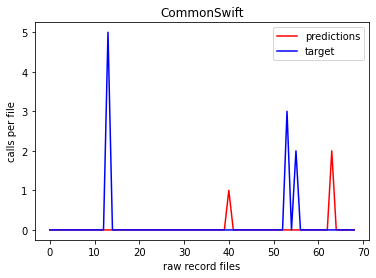

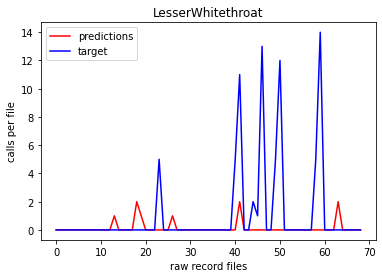

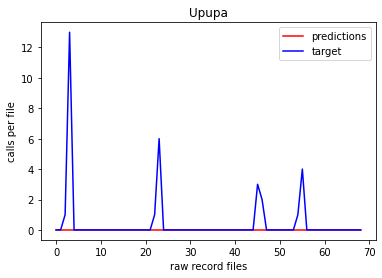

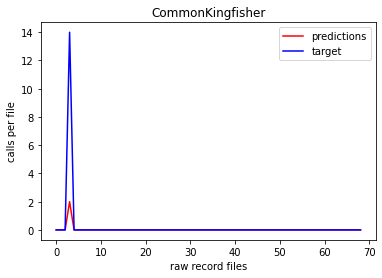

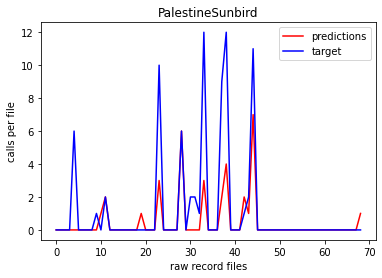

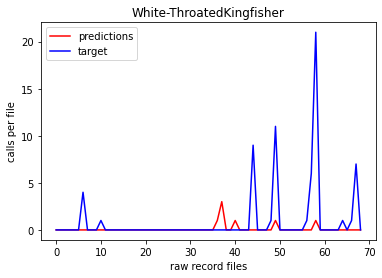

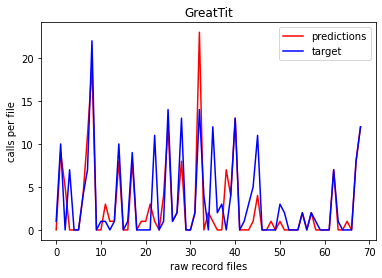

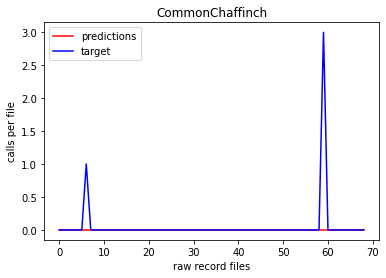

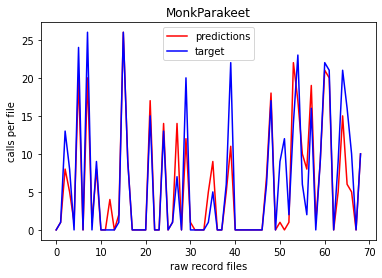

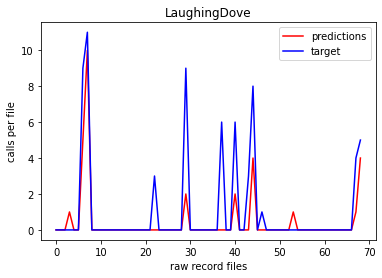

In [30]:
for label in sr.stats_dict.keys():
  png_path = Path(plots_path, experiment_name, f'th_0_1 {label}.png')
  anz.plot_label_record_count(sr.stats_dict[label]['record_pos_count_pred'], sr.stats_dict[label]['record_pos_count_target'], title=label, png_dst=png_path)

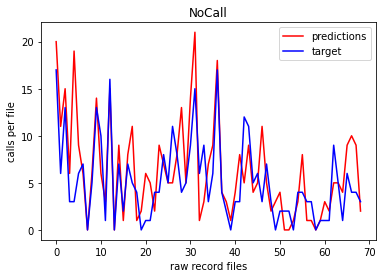

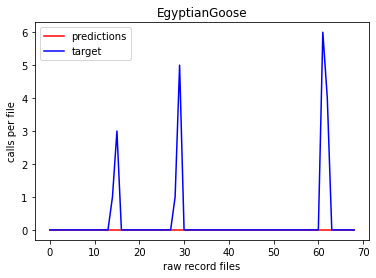

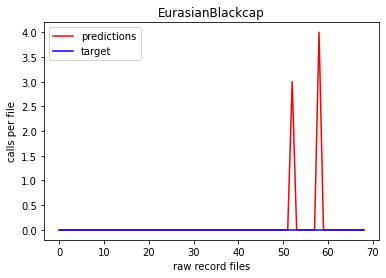

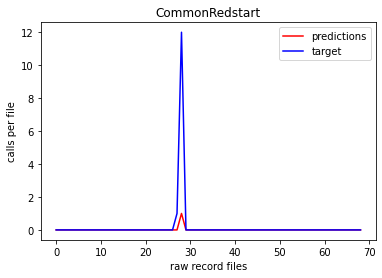

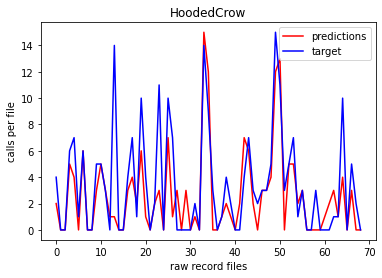

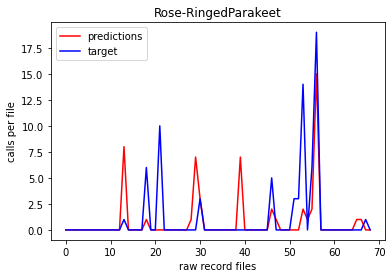

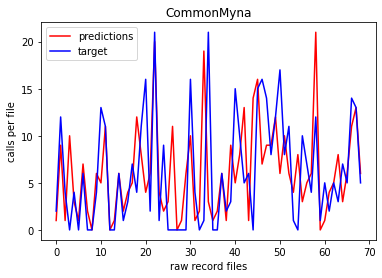

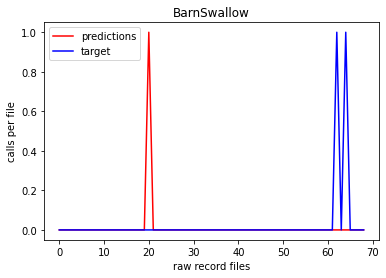

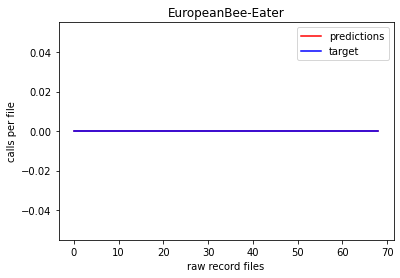

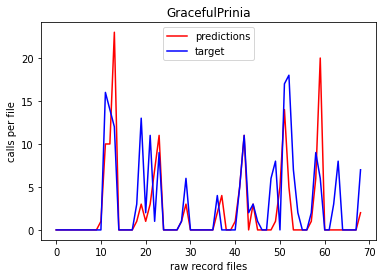

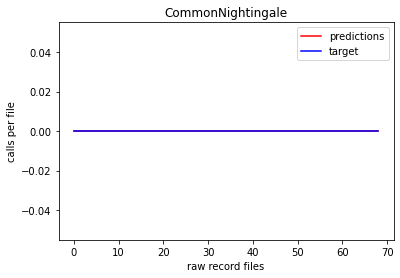

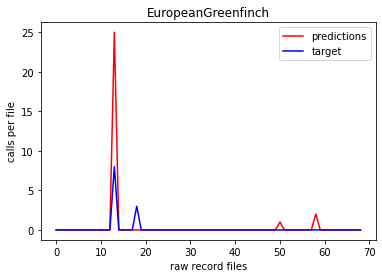

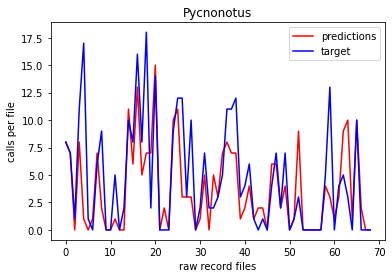

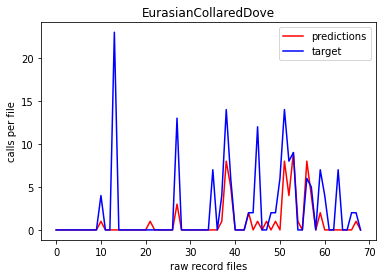

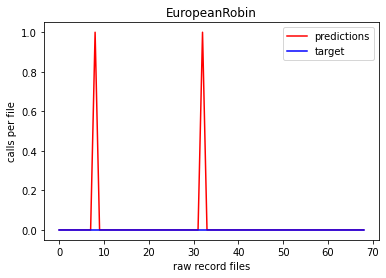

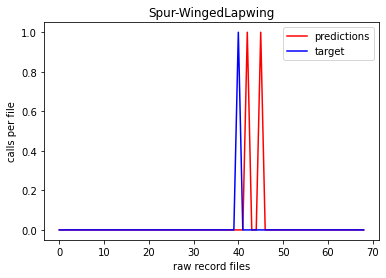

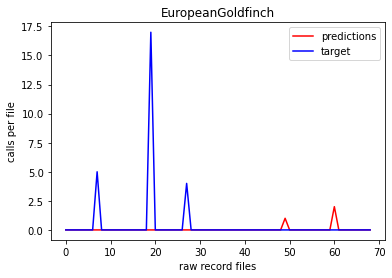

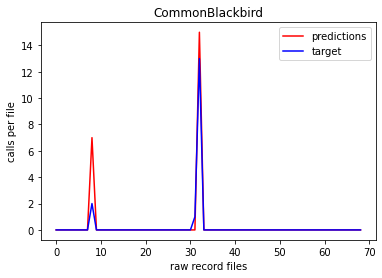

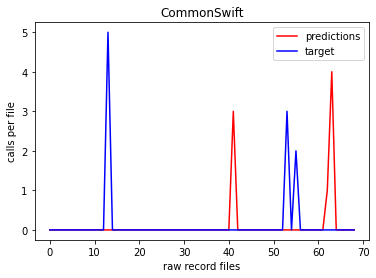

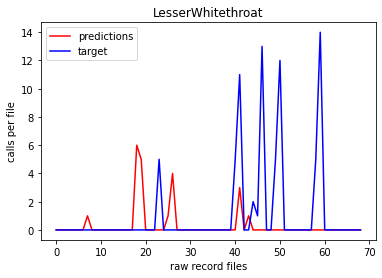

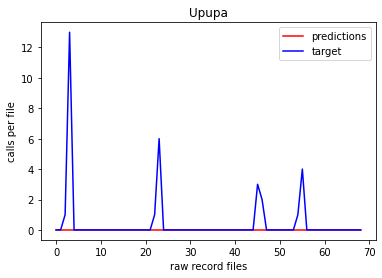

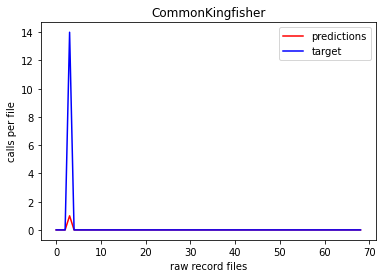

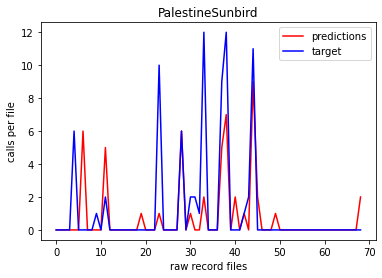

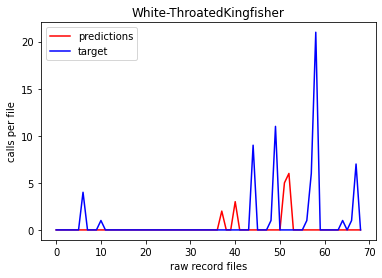

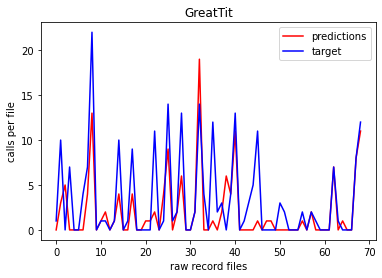

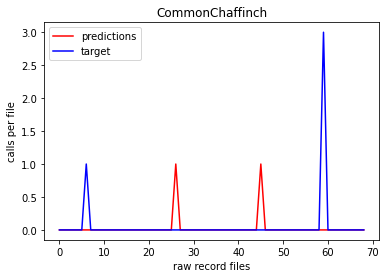

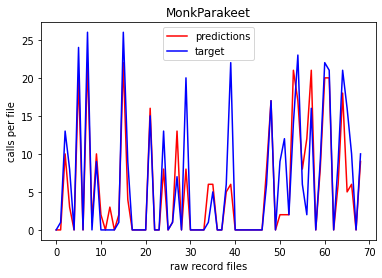

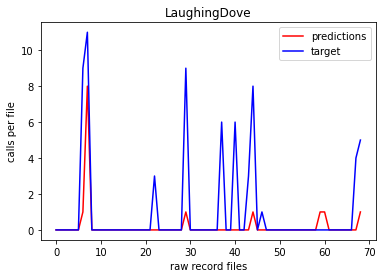

In [48]:
sr = anz.SSASTResults(pred_path, target_path, args_path=args_path, labels_path=labels_path)
sr.calc_stats(th=0.5)
for label in sr.stats_dict.keys():
  png_path = Path(plots_path, experiment_name, f'th_0_5 {label}.png')
  anz.plot_label_record_count(sr.stats_dict[label]['record_pos_count_pred'], sr.stats_dict[label]['record_pos_count_target'], title=label, png_dst=png_path)

## Stats CSV

In [10]:
sr.stats_to_csv(csv_dst_path)
sc = anz.StatsCsv(csv_dst_path)

In [11]:
total_calls_dict = dict(zip(sc.labels, sc.total_calls))
total_calls_dict

{'NoCall': 342.0,
 'PalestineSunbird/GreatTit': 368.0,
 'CommonMyna/PalestineSunbird?': 124.0,
 'Rose-RingedParakeet': 451.0,
 'CommonMyna?': 71.0,
 'EuropeanBee-Eater': 210.0,
 'GreatTit/PalestineSunbird': 33.0,
 'PalestineSunbird?': 343.0,
 'EurasianStone-Curlew?': 99.0,
 'Unknown': 44.0,
 'GracefulPrinia/PalestineSunbird': 268.0,
 'CommonNightingale?': 38.0,
 'CommonChiffchaff/PalestineSunbird': 101.0,
 'CommonBlackbird': 27.0,
 'CommonSwift': 0.0,
 'LaughingDove': 203.0}

In [12]:
sc.df

,Unnamed: 0,NoCall,PalestineSunbird/GreatTit,CommonMyna/PalestineSunbird?,Rose-RingedParakeet,CommonMyna?,EuropeanBee-Eater,GreatTit/PalestineSunbird,PalestineSunbird?,EurasianStone-Curlew?,Unknown,GracefulPrinia/PalestineSunbird,CommonNightingale?,CommonChiffchaff/PalestineSunbird,CommonBlackbird,CommonSwift,LaughingDove
0,acc,0.8717186726102031,0.8915304606240714,0.9504705299653293,0.8999504705299654,0.9648340762753839,0.9390787518573551,0.9876176324913324,0.8296186230807331,0.9633481921743438,0.9791976225854383,0.9143140168400198,0.979692917285785,0.9465081723625557,0.986627043090639,1.0,0.962852897473997
1,precision,0.6554307116104869,0.8197424892703863,0.8,0.801452784503632,0.5,0.7377049180327869,0.9,0.49836065573770494,0.6506024096385542,0.5555555555555556,0.768361581920904,0.2,0.41025641025641024,0.0,0.0,0.8440860215053764
2,recall,0.5116959064327485,0.5190217391304348,0.25806451612903225,0.7339246119733924,0.19718309859154928,0.6428571428571429,0.2727272727272727,0.44314868804664725,0.5454545454545454,0.22727272727272727,0.5074626865671642,0.02631578947368421,0.15841584158415842,0.0,0.0,0.7733990147783252
3,total_calls,342,368,124,451,71,210,33,343,99,44,268,38,101,27,0,203
4,auc_score,0.868632025302772,0.8780860743159613,0.820457060175334,0.9478808430245713,0.8485409376174915,0.9296059385611624,0.8525588208367665,0.7876469032891028,0.9577388468013468,0.9684810126582278,0.9326845214248575,0.8178750763835384,0.9422252965651101,0.47131117060835936,0,0.9628697293895531
5,record_pos_count_target,[ 9 3 10 3 5 2 8 14 1 1 1 2 2 17 9 ...,[ 6 19 0 1 9 21 9 4 0 2 2 0 1 2 0 ...,[ 3 0 0 1 1 2 0 0 0 0 0 0 0 1 1 ...,[ 7 3 14 13 4 3 8 4 11 18 0 15 15 0 20 ...,[ 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 ...,[ 0 7 5 3 0 9 3 0 2 2 5 3 3 2 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 2 8 10 13 3 5 0 0 1 16 8 3 0 0 ...,[13 0 0 0 0 0 0 2 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 5 4 0 0 0 ...,[ 0 0 0 1 0 0 5 0 0 8 15 9 3 7 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[ 4 17 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[ 0 0 0 0 0 0 0 9 16 1 5 0 12 11 0 ...
6,record_pos_count_pred,[ 8 3 9 1 4 2 13 19 0 0 1 1 0 4 1 ...,[ 8 13 0 1 1 4 8 1 0 3 1 1 3 2 3 ...,[ 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 ...,[ 9 1 9 14 13 3 6 1 13 16 0 13 15 0 20 ...,[0 0 0 0 0 0 1 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[ 0 7 2 3 1 9 1 0 1 1 6 2 3 3 1 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[ 1 1 6 9 6 3 2 0 0 0 2 7 1 2 1 ...,[ 4 0 0 0 0 1 0 0 3 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 ...,[ 0 2 0 0 0 0 1 0 0 5 19 8 3 3 0 ...,[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0...,[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[ 0 2 0 0 0 0 0 9 15 1 1 0 12 14 0 ...


In [13]:
sc.df['LaughingDove'][sc.stat_row['record_pos_count_target']]

'[ 0  0  0  0  0  0  0  9 16  1  5  0 12 11  0  7  4  0  0  0  0  0  0  0\n  0  0  0  0  0  6 16  0  2  0  0  0  7  5  0  0 11  3  0  0  0  0  0  2\n 16  6 29 20  4  0  0  0  0  0  0  0  0  0  0  5  6  0  0]'

In [14]:
sc.df['LaughingDove'][sc.stat_row['record_pos_count_pred']]

'[ 0  2  0  0  0  0  0  9 15  1  1  0 12 14  0 10  4  0  0  0  0  0  0  0\n  0  0  0  0  0  6 15  0  2  0  0  1  5  3  6  3  2  0  0  0  0  0  0  2\n 15  5 23 19  0  0  0  0  0  0  0  0  0  0  0  7  4  0  0]'

In [ ]:
anz.get_record_name_from_json(validate_json, 0)

'/content/gdrive/My Drive/DeepLearning/project/labeled_data/validate/9_20200325_055000_0.WAV'